<a href="https://colab.research.google.com/github/pattyhumemills/pattyhumemills.github.io/blob/master/Tensorflow%20and%20Computer%20Vision%20with%20Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtain
Fashion MNIST data from TensorFlow

In [ ]:
# Import libraries: TensorFlow, Keras, Numpy, PyPlot, MatPlotLib, Seaborn

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import pandas as pd

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras import utils
from keras.utils import np_utils

from keras import backend as K
from tensorflow.keras import layers

import time
%matplotlib inline
print(tf.__version__)

2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


# Scrub

In [ ]:
num_pixels = train_images.shape[1] * train_images.shape[2]
X_train = train_images.reshape(train_images.shape[0], num_pixels).astype('float32')
X_test = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


In [ ]:
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)
num_classes = y_test.shape[1]

# Explore


In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train.dtype

dtype('float32')

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

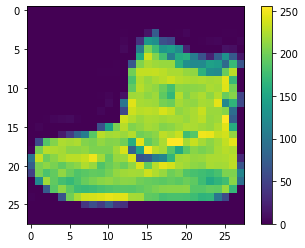

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

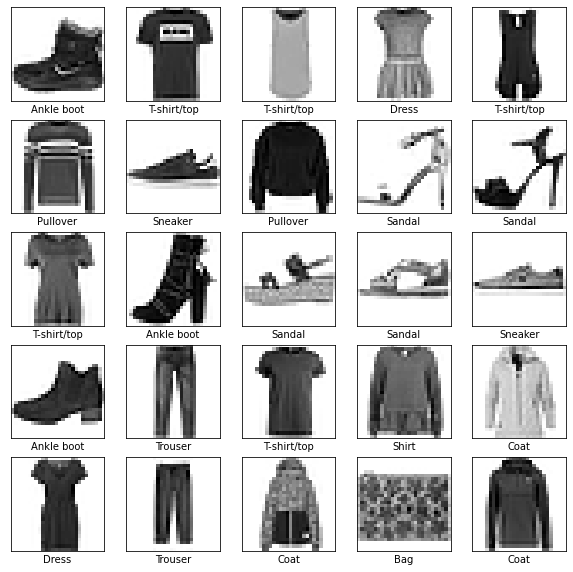

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model

## Model 1
Simple Neural Network using Keras

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
def baseline_model():
  model = keras.Sequential()
  model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer = 'adam', metrics = ['accuracy'])
  return model

In [ ]:
start = time.time()
model = baseline_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 10, batch_size=200, verbose=2)
scores = model.evaluate(X_test,y_test,verbose= 0)
print("Baseline Error : %.2f%%" % (100-scores[1]*100))
end = time.time()
final_time = end-start
print(final_time)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 1s - loss: 11.4434 - acc: 0.2894 - val_loss: 10.4646 - val_acc: 0.3505
Epoch 2/10
60000/60000 - 1s - loss: 10.5822 - acc: 0.3431 - val_loss: 10.9015 - val_acc: 0.3232
Epoch 3/10
60000/60000 - 1s - loss: 10.5658 - acc: 0.3442 - val_loss: 10.4315 - val_acc: 0.3526
Epoch 4/10
60000/60000 - 1s - loss: 10.5012 - acc: 0.3482 - val_loss: 10.4938 - val_acc: 0.3488
Epoch 5/10
60000/60000 - 1s - loss: 10.6511 - acc: 0.3390 - val_loss: 10.5223 - val_acc: 0.3469
Epoch 6/10
60000/60000 - 1s - loss: 10.3973 - acc: 0.3548 - val_loss: 10.3152 - val_acc: 0.3600
Epoch 7/10
60000/60000 - 1s - loss: 10.3859 - acc: 0.3555 - val_loss: 10.2735 - val_acc: 0.3626
Epoch 8/10
60000/60000 - 1s - loss: 10.4586 - acc: 0.3510 - val_loss: 10.1629 - val_acc: 0.3694
Epoch 9/10
60000/60000 - 1s - loss: 10.3224 - acc: 0.3595 - val_loss: 10.5088 - val_acc: 0.3479
Epoch 10/10
60000/60000 - 1s - loss: 10.4561 - acc: 0.3512 - val_loss: 10.1496 - val_a

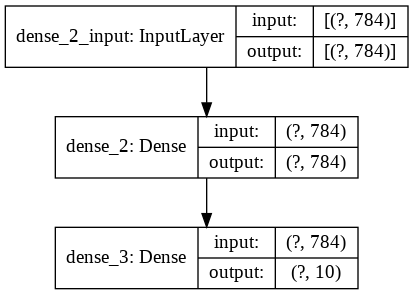

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)
#print(model.summary())

In [ ]:
start = time.time()
model = baseline_model()
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 100, batch_size=200, verbose=2)
scores = model.evaluate(X_test,y_test,verbose= 0)
print("Baseline Error : %.2f%%" % (100-scores[1]*100))
end = time.time()
final_time = end-start
print(final_time)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 - 1s - loss: 12.4920 - acc: 0.2247 - val_loss: 12.4181 - val_acc: 0.2294
Epoch 2/100
60000/60000 - 1s - loss: 12.2863 - acc: 0.2376 - val_loss: 12.0289 - val_acc: 0.2536
Epoch 3/100
60000/60000 - 1s - loss: 12.1655 - acc: 0.2451 - val_loss: 12.2091 - val_acc: 0.2424
Epoch 4/100
60000/60000 - 1s - loss: 12.3092 - acc: 0.2362 - val_loss: 12.2046 - val_acc: 0.2428
Epoch 5/100
60000/60000 - 1s - loss: 12.1854 - acc: 0.2439 - val_loss: 11.9308 - val_acc: 0.2597
Epoch 6/100
60000/60000 - 1s - loss: 12.2295 - acc: 0.2412 - val_loss: 12.8807 - val_acc: 0.2005
Epoch 7/100
60000/60000 - 1s - loss: 12.4131 - acc: 0.2297 - val_loss: 12.1683 - val_acc: 0.2449
Epoch 8/100
60000/60000 - 1s - loss: 12.1758 - acc: 0.2445 - val_loss: 11.9876 - val_acc: 0.2562
Epoch 9/100
60000/60000 - 1s - loss: 11.8987 - acc: 0.2617 - val_loss: 11.8097 - val_acc: 0.2673
Epoch 10/100
60000/60000 - 1s - loss: 11.8938 - acc: 0.2620 - val_loss: 11.71

# Interpret
## Model 1

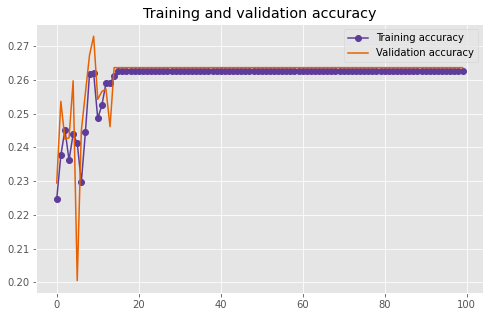

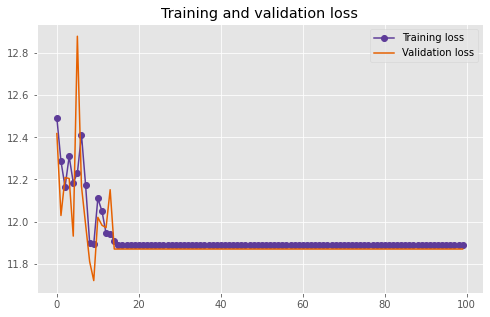

In [ ]:
def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

In [ ]:
def updated_model():
    model = keras.Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:

start = time.time()  
model = updated_model()

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 10, batch_size=400, verbose=2)
scores = model.evaluate(X_test,y_test,verbose= 0)

end = time.time()
final_time = end-start
print(final_time) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 1s - loss: 10.6759 - acc: 0.3366 - val_loss: 9.9251 - val_acc: 0.3840
Epoch 2/10
60000/60000 - 1s - loss: 11.2654 - acc: 0.3009 - val_loss: 11.6389 - val_acc: 0.2777
Epoch 3/10
60000/60000 - 1s - loss: 11.5223 - acc: 0.2851 - val_loss: 11.6019 - val_acc: 0.2800
Epoch 4/10
60000/60000 - 1s - loss: 11.2015 - acc: 0.3047 - val_loss: 10.1097 - val_acc: 0.3727
Epoch 5/10
60000/60000 - 1s - loss: 10.6809 - acc: 0.3371 - val_loss: 9.9406 - val_acc: 0.3831
Epoch 6/10
60000/60000 - 1s - loss: 10.1384 - acc: 0.3709 - val_loss: 10.0116 - val_acc: 0.3788
Epoch 7/10
60000/60000 - 1s - loss: 10.2433 - acc: 0.3643 - val_loss: 9.9908 - val_acc: 0.3801
Epoch 8/10
60000/60000 - 1s - loss: 10.1534 - acc: 0.3699 - val_loss: 9.9586 - val_acc: 0.3820
Epoch 9/10
60000/60000 - 1s - loss: 10.8752 - acc: 0.3252 - val_loss: 10.1745 - val_acc: 0.3686
Epoch 10/10
60000/60000 - 1s - loss: 10.0229 - acc: 0.3781 - val_loss: 11.0641 - val_acc: 

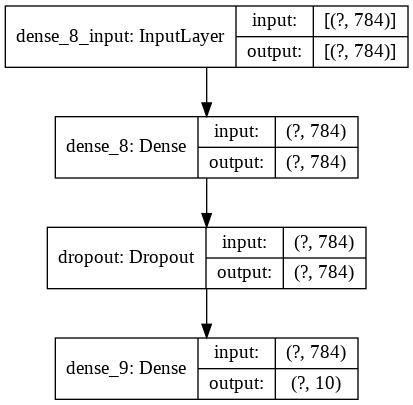

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)
#print(model.summary())

In [ ]:
start_sk = time.time()
model = updated_model()

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=400, verbose=2)


scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
end_sk = time.time()
final_time_simpleKeras = end_sk-start_sk
print(final_time_simpleKeras)  

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 - 1s - loss: 11.6359 - acc: 0.2776 - val_loss: 11.3980 - val_acc: 0.2927
Epoch 2/100
60000/60000 - 1s - loss: 11.4270 - acc: 0.2910 - val_loss: 11.3713 - val_acc: 0.2945
Epoch 3/100
60000/60000 - 1s - loss: 11.3659 - acc: 0.2948 - val_loss: 11.3713 - val_acc: 0.2945
Epoch 4/100
60000/60000 - 1s - loss: 11.4519 - acc: 0.2894 - val_loss: 11.3553 - val_acc: 0.2954
Epoch 5/100
60000/60000 - 1s - loss: 11.3578 - acc: 0.2953 - val_loss: 11.3552 - val_acc: 0.2955
Epoch 6/100
60000/60000 - 1s - loss: 11.3801 - acc: 0.2939 - val_loss: 11.3794 - val_acc: 0.2940
Epoch 7/100
60000/60000 - 1s - loss: 11.3700 - acc: 0.2946 - val_loss: 11.3600 - val_acc: 0.2952
Epoch 8/100
60000/60000 - 1s - loss: 11.4310 - acc: 0.2907 - val_loss: 11.4463 - val_acc: 0.2898
Epoch 9/100
60000/60000 - 1s - loss: 11.4750 - acc: 0.2880 - val_loss: 11.3890 - val_acc: 0.2934
Epoch 10/100
60000/60000 - 1s - loss: 11.3772 - acc: 0.2941 - val_loss: 11.39

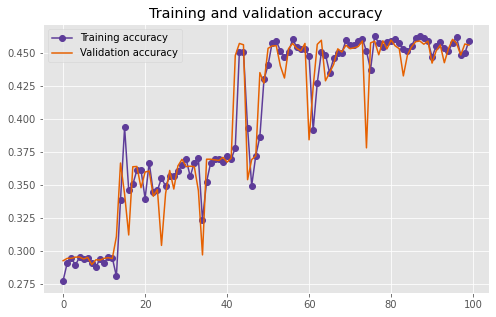

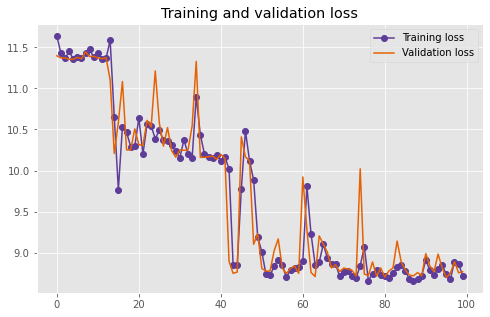

In [ ]:

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predictions1 = model.predict(X_test)
y_pred = np.argmax(predictions1, axis=1)
y_testL = np.argmax(y_test,axis=1) 
print(y_pred[0])
print(y_testL[0])
cnf_matrix1 = confusion_matrix(y_testL, y_pred)
print(cnf_matrix1)
cls_rep1 = classification_report(y_testL, y_pred,output_dict=True)
print(cls_rep1)

5
9
[[ 769   10   69  149    0    3    0    0    0    0]
 [   1  894   20   85    0    0    0    0    0    0]
 [  10    2  963   25    0    0    0    0    0    0]
 [  14    7   43  935    0    1    0    0    0    0]
 [   2    3  819  176    0    0    0    0    0    0]
 [   1    0    0    0    0  999    0    0    0    0]
 [ 205    5  649  139    0    2    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   5    1  612   67    0  315    0    0    0    0]
 [   0    0    1    0    0  999    0    0    0    0]]
{'0': {'precision': 0.7636544190665343, 'recall': 0.769, 'f1-score': 0.7663178873941205, 'support': 1000}, '1': {'precision': 0.9696312364425163, 'recall': 0.894, 'f1-score': 0.9302809573361083, 'support': 1000}, '2': {'precision': 0.3032115869017632, 'recall': 0.963, 'f1-score': 0.46120689655172414, 'support': 1000}, '3': {'precision': 0.5932741116751269, 'recall': 0.935, 'f1-score': 0.7259316770186335, 'support': 1000}, '4': {'precision': 0.0, 'recall': 0.0, 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[ 769   10   69  149    0    3    0    0    0    0]
 [   1  894   20   85    0    0    0    0    0    0]
 [  10    2  963   25    0    0    0    0    0    0]
 [  14    7   43  935    0    1    0    0    0    0]
 [   2    3  819  176    0    0    0    0    0    0]
 [   1    0    0    0    0  999    0    0    0    0]
 [ 205    5  649  139    0    2    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   5    1  612   67    0  315    0    0    0    0]
 [   0    0    1    0    0  999    0    0    0    0]]


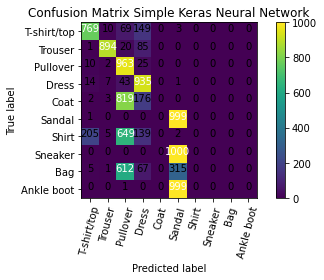

In [ ]:
np.set_printoptions(precision=2)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='viridis'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='viridis')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix1, classes=class_names,
                      title='Confusion Matrix Simple Keras Neural Network')

              precision  recall  f1-score    support
T-shirt/top    0.763654   0.769  0.766318   1000.000
Trouser        0.969631   0.894  0.930281   1000.000
Pullover       0.303212   0.963  0.461207   1000.000
Dress          0.593274   0.935  0.725932   1000.000
Coat           0.000000   0.000  0.000000   1000.000
Sandal         0.300994   0.999  0.462607   1000.000
Shirt          0.000000   0.000  0.000000   1000.000
Sneaker        0.000000   0.000  0.000000   1000.000
Bag            0.000000   0.000  0.000000   1000.000
Ankle boot     0.000000   0.000  0.000000   1000.000
accuracy       0.456000   0.456  0.456000      0.456
macro avg      0.293077   0.456  0.334634  10000.000
weighted avg   0.293077   0.456  0.334634  10000.000


Text(0.5, 1.0, 'Classification Report for Simple Keras Neural Network')

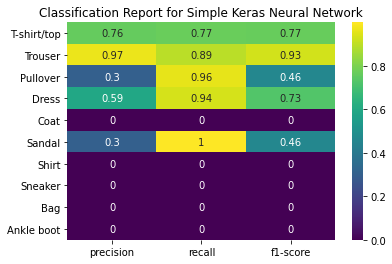

In [ ]:
cls_rep1_DF = pd.DataFrame.from_dict(cls_rep1).transpose()
cls_rep1_DF.index = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot',"accuracy","macro avg","weighted avg"]
print(cls_rep1_DF)
intpt1 = sns.heatmap(pd.DataFrame(cls_rep1_DF).iloc[:-3, :-1], annot=True,cmap='viridis')
intpt1.set_title('Classification Report for Simple Keras Neural Network')

## Model 2 Convolution Neural Network

In [ ]:
def complex_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [ ]:
# The commented portions below should be run ONCE per runtime. Otherwise, you have to start back at square one and no one wants that!
#train_images = np.expand_dims(train_images, -1)
#test_images = np.expand_dims(test_images, -1)
#train_labels = keras.utils.to_categorical(train_labels, num_classes)
#test_labels = keras.utils.to_categorical(test_labels, num_classes)
batch_size = 200
epochs = 5
input_shape = (28, 28, 1)
start = time.time()  
model = complex_model()
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)



score = model.evaluate(test_images, test_labels, verbose=0)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

end = time.time()
final_time = end-start
print(final_time)  

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 103us/sample - loss: 0.7561 - acc: 0.7277 - val_loss: 0.4625 - val_acc: 0.8317
Epoch 2/5
54000/54000 [==============================] - 5s 102us/sample - loss: 0.4720 - acc: 0.8303 - val_loss: 0.3987 - val_acc: 0.8583
Epoch 3/5
54000/54000 [==============================] - 5s 100us/sample - loss: 0.4176 - acc: 0.8499 - val_loss: 0.3608 - val_acc: 0.8688
Epoch 4/5
54000/54000 [==============================] - 5s 99us/sample - loss: 0.3902 - acc: 0.8600 - val_loss: 0.3462 - val_acc: 0.8765
Epoch 5/5
54000/54000 [==============================] - 5s 100us/sample - loss: 0.3684 - acc: 0.8679 - val_loss: 0.3382 - val_acc: 0.8757
Baseline Error: 12.28%
28.710262060165405


In [ ]:
start_ck = time.time()
model = complex_model()


batch_size = 400
epochs = 100

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)


score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
end_ck = time.time()
final_time_complexKeras = end_ck-start_ck
print(final_time_complexKeras) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 5s 86us/sample - loss: 0.9160 - acc: 0.6795 - val_loss: 0.5194 - val_acc: 0.8083
Epoch 2/100
54000/54000 [==============================] - 5s 84us/sample - loss: 0.5228 - acc: 0.8092 - val_loss: 0.4490 - val_acc: 0.8390
Epoch 3/100
54000/54000 [==============================] - 5s 85us/sample - loss: 0.4640 - acc: 0.8329 - val_loss: 0.3994 - val_acc: 0.8582
Epoch 4/100
54000/54000 [==============================] - 5s 84us/sample - loss: 0.4311 - acc: 0.8451 - val_loss: 0.3786 - val_acc: 0.8628
Epoch 5/100
54000/54000 [==============================] - 5s 85us/sample - loss: 0.4094 - acc: 0.8529 - val_loss: 0.3655 - val_acc: 0.8708
Epoch 6/100
54000/54000 [==============================] - 5s 85us/sample - loss: 0.3889 - acc: 0.8599 - val_loss: 0.3524 - val_acc: 0.8745
Epoch 7/100
54000/54000 [==============================] - 5s 84us/sample - loss: 0.3752 - acc: 0.8662 - val_lo

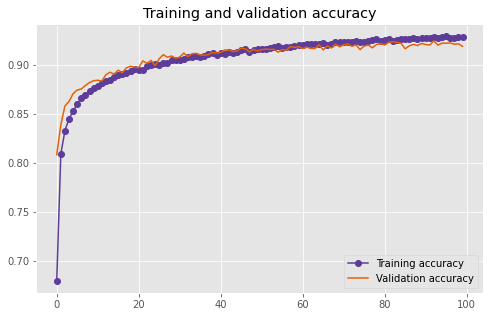

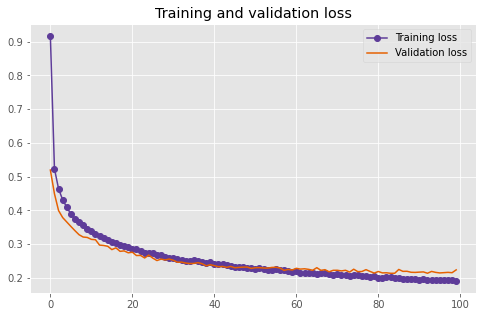

In [ ]:


def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)


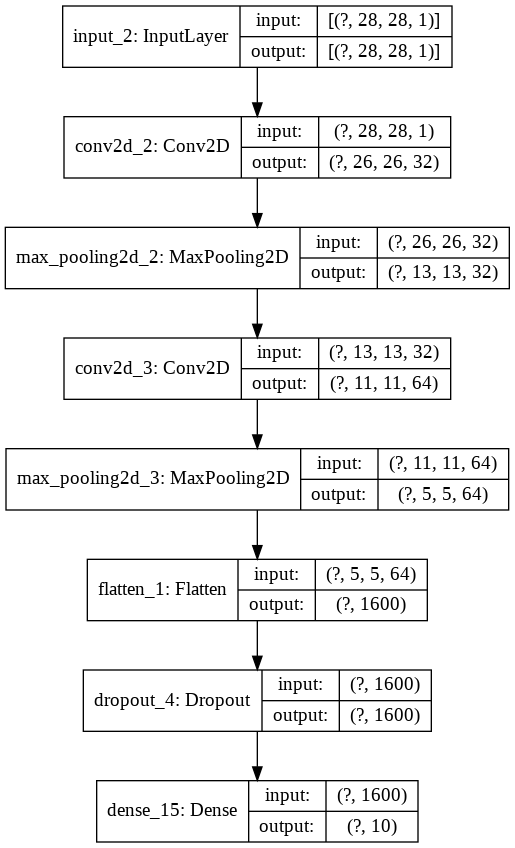

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
predictions2 = model.predict(test_images)
y_pred = np.argmax(predictions2, axis=1)
y_testL = np.argmax(test_labels,axis=1) 
print(y_pred[0])
print(y_testL[0])
cnf_matrix2 = confusion_matrix(y_testL, y_pred)
print(cnf_matrix2)
cls_rep2 = classification_report(y_testL, y_pred,output_dict=True)
print(cls_rep2)

9
9
[[847   0  14  19   4   1 109   0   5   1]
 [  1 982   0  12   2   0   1   0   2   0]
 [ 14   0 823   8  79   0  75   0   1   0]
 [ 11   2   9 918  29   0  28   0   3   0]
 [  1   0  20  21 906   0  50   0   2   0]
 [  0   0   0   0   0 983   0  13   0   4]
 [105   0  43  24  88   0 728   0  12   0]
 [  0   0   0   0   0   7   0 979   1  13]
 [  1   0   2   3   3   2   1   2 985   1]
 [  1   0   0   0   0   4   0  35   0 960]]
{'0': {'precision': 0.8634046890927625, 'recall': 0.847, 'f1-score': 0.8551236749116607, 'support': 1000}, '1': {'precision': 0.9979674796747967, 'recall': 0.982, 'f1-score': 0.9899193548387097, 'support': 1000}, '2': {'precision': 0.9034028540065862, 'recall': 0.823, 'f1-score': 0.8613291470434327, 'support': 1000}, '3': {'precision': 0.9134328358208955, 'recall': 0.918, 'f1-score': 0.91571072319202, 'support': 1000}, '4': {'precision': 0.8154815481548154, 'recall': 0.906, 'f1-score': 0.8583609663666508, 'support': 1000}, '5': {'precision': 0.985957873620862

Confusion matrix, without normalization
[[847   0  14  19   4   1 109   0   5   1]
 [  1 982   0  12   2   0   1   0   2   0]
 [ 14   0 823   8  79   0  75   0   1   0]
 [ 11   2   9 918  29   0  28   0   3   0]
 [  1   0  20  21 906   0  50   0   2   0]
 [  0   0   0   0   0 983   0  13   0   4]
 [105   0  43  24  88   0 728   0  12   0]
 [  0   0   0   0   0   7   0 979   1  13]
 [  1   0   2   3   3   2   1   2 985   1]
 [  1   0   0   0   0   4   0  35   0 960]]


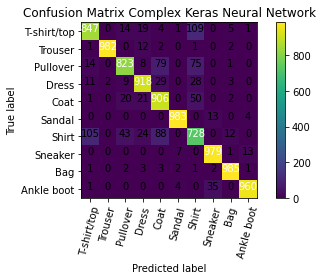

In [ ]:
np.set_printoptions(precision=2)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='viridis'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='viridis')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=class_names,
                      title='Confusion Matrix Complex Keras Neural Network')

              precision  recall  f1-score     support
T-shirt/top    0.863405  0.8470  0.855124   1000.0000
Trouser        0.997967  0.9820  0.989919   1000.0000
Pullover       0.903403  0.8230  0.861329   1000.0000
Dress          0.913433  0.9180  0.915711   1000.0000
Coat           0.815482  0.9060  0.858361   1000.0000
Sandal         0.985958  0.9830  0.984477   1000.0000
Shirt          0.733871  0.7280  0.730924   1000.0000
Sneaker        0.951409  0.9790  0.965007   1000.0000
Bag            0.974283  0.9850  0.979612   1000.0000
Ankle boot     0.980592  0.9600  0.970187   1000.0000
accuracy       0.911100  0.9111  0.911100      0.9111
macro avg      0.911980  0.9111  0.911065  10000.0000
weighted avg   0.911980  0.9111  0.911065  10000.0000


Text(0.5, 1.0, 'Classification Report for Complex Keras Neural Network')

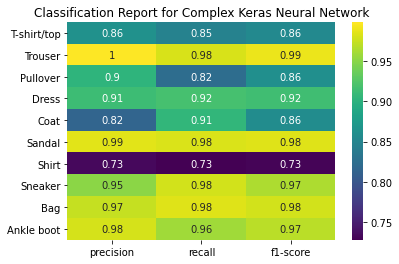

In [ ]:
cls_rep2_DF = pd.DataFrame.from_dict(cls_rep2).transpose()
cls_rep2_DF.index = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot',"accuracy","macro avg","weighted avg"]
print(cls_rep2_DF)
intpt2 = sns.heatmap(pd.DataFrame(cls_rep2_DF).iloc[:-3, :-1], annot=True,cmap='viridis')
intpt2.set_title('Classification Report for Complex Keras Neural Network')

In [ ]:
import prettytable
from prettytable import PrettyTable
#cls_rep1_DF.precision[10]
t = PrettyTable()
t.field_names = ["Model Name", "Final Time","Accuracy"]
t.add_row(["Simple Keras Neural Network",final_time_simpleKeras,cls_rep1_DF.precision[10]*100])
t.add_row(["Complex Keras Neural Network", final_time_complexKeras,cls_rep2_DF.precision[10]*100])
print(t)

+------------------------------+-------------------+----------+
|          Model Name          |     Final Time    | Accuracy |
+------------------------------+-------------------+----------+
| Simple Keras Neural Network  | 94.96746850013733 |   45.6   |
| Complex Keras Neural Network | 467.5568118095398 |  91.11   |
+------------------------------+-------------------+----------+
